<a href="https://colab.research.google.com/github/nfs3/ca_oa/blob/main/1D_KalmanF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.0299917923504686 -0.0299082076495313
[-0.02990821 -0.02990322 -0.02989822 ...  0.02998181  0.0299868
  0.02999179]


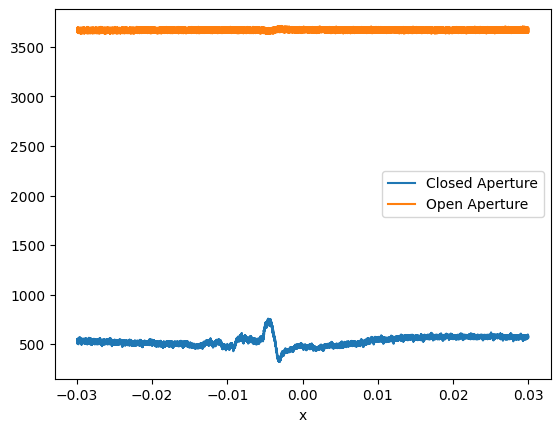

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sys as ss
df = pd.read_csv("/content/drive/MyDrive/datum/193_ca_oa.csv")
df_x = pd.read_csv("/content/drive/MyDrive/datum/193_calculated.csv")
print(df_x.x.max(), df_x.x.min())

high = df_x.x.max()
low = df_x.x.min()

x = np.linspace(low, high, df.shape[0])

print(x)

# print(df)
df.columns = ['Closed Aperture', 'Open Aperture']

df['x'] = x

df.plot(x='x')

plt.show()


0.0299917923504686 -0.0299082076495313
[-0.02990821 -0.02990322 -0.02989822 ...  0.02998181  0.0299868
  0.02999179]


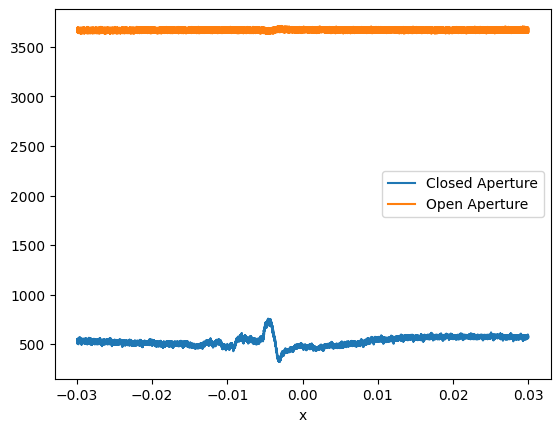

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sys as ss
df = pd.read_csv("/content/drive/MyDrive/datum/193_ca_oa.csv")
df_x = pd.read_csv("/content/drive/MyDrive/datum/193_calculated.csv")
print(df_x.x.max(), df_x.x.min())

high = df_x.x.max()
low = df_x.x.min()

x = np.linspace(low, high, df.shape[0])

print(x)

df.columns = ['Closed Aperture', 'Open Aperture']
df['x'] = x

df.plot(x='x')

plt.show()

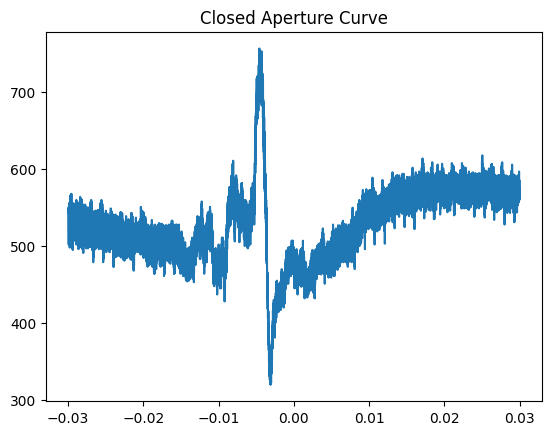

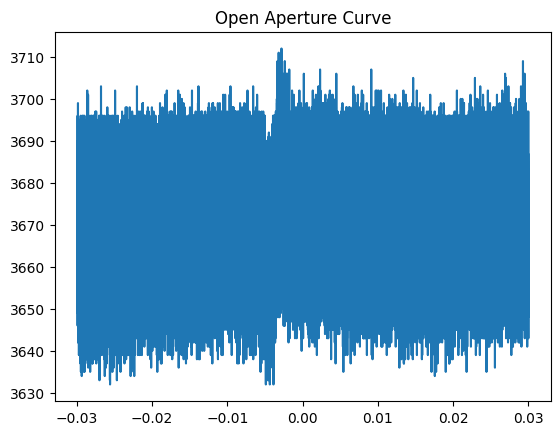

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV files, ensuring correct header handling
df = pd.read_csv("/content/drive/MyDrive/datum/193_ca_oa.csv", header=0)
df_x = pd.read_csv("/content/drive/MyDrive/datum/193_calculated.csv", header=0)

# Extract x-axis values robustly
try:
    high = df_x.x.max()
    low = df_x.x.min()
except AttributeError:
    raise ValueError("Column 'x' not found in df_x for x-axis values.")

x = np.linspace(low, high, df.shape[0])

# Create DataFrame with verified column names
df = pd.DataFrame({'x': x, 'Closed Aperture': df['551'], 'Open Aperture': df['3696']})

# Generate separate plots with informative titles
plt.figure(1)
plt.title("Closed Aperture Curve")
plt.plot(df['x'], df['Closed Aperture'])

plt.figure(2)
plt.title("Open Aperture Curve")
plt.plot(df['x'], df['Open Aperture'])

plt.show()

In [19]:
!pip install pykalman

In [20]:
!pip install filterpy


In [21]:
df

,x,Closed Aperture,Open Aperture
0,-0.029908,550,3679
1,-0.029903,502,3663
2,-0.029898,537,3646
3,-0.029893,550,3696
4,-0.029888,537,3682
...,...,...,...
11994,0.029972,560,3697
11995,0.029977,563,3678
11996,0.029982,576,3663
11997,0.029987,565,3643


In [22]:
!pip install pykalman


[-0.17985571]


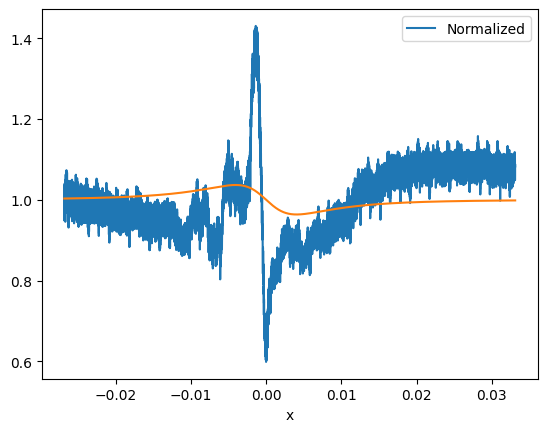

In [23]:
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import sys as ss

wave_length = 660e-9
w0 = 31.5e-6
k = 2 * np.pi / wave_length
z0 = k * w0 * w0 / 2


def z_formulae(z, phi):
    x = z/z0

    return 1+phi*4*x/((1+x*x)*(9+x*x))

# Read CSV files, ensuring correct header handling
df = pd.read_csv("/content/drive/MyDrive/datum/193_ca_oa.csv", header=0)
df_x = pd.read_csv("/content/drive/MyDrive/datum/193_calculated.csv", header=0)

# print(df_x.x.max(), df_x.x.min())

high = df_x.x.max()
low = df_x.x.min()

x = np.linspace(low, high, df.shape[0])
# print(x)


# print(df)
df.columns = ['Closed Aperture', 'Open Aperture']
df['Normalized'] = df['Closed Aperture'] / df['Open Aperture']
df['Normalized'] = df['Normalized'] / df['Normalized'].mean()
df['x'] = x + 0.0031


df.plot(x='x', y='Normalized')
# plt.figure()
# df.plot(x='x')

popt, pcov = curve_fit(z_formulae, df['x'].to_numpy(), df['Normalized'].to_numpy())

plt.plot(df['x'], z_formulae(df['x'], *popt))

print(popt)

plt.show()

[-1.1597972]


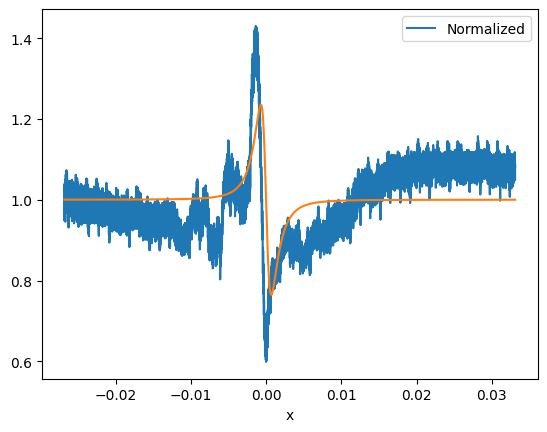

In [24]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Physical constants and derived values
wave_length = 660e-9  # Wavelength in meters
w0 = 13e-6  # Beam waist radius in meters
k = 2 * np.pi / wave_length  # Wavenumber
z0 = k * w0 * w0 / 2  # Rayleigh range

# Function to model the data
def z_formulae(z, phi):
    """
    Models the normalized closed aperture signal as a function of distance.

    Args:
        z: Distance in meters.
        phi: A parameter to fit.

    Returns:
        The modeled normalized closed aperture signal.
    """
    x = z / z0
    return 1 + phi * 4 * x / ((1 + x**2) * (9 + x**2))

# Read CSV data
df = pd.read_csv("/content/drive/MyDrive/datum/193_ca_oa.csv", header=0)
df_x = pd.read_csv("/content/drive/MyDrive/datum/193_calculated.csv", header=0)

# Extract relevant data
high = df_x.x.max()       # Maximum x value
low = df_x.x.min()        # Minimum x value
x = np.linspace(low, high, df.shape[0])  # Create evenly spaced x values

# Process data
df.columns = ['Closed Aperture', 'Open Aperture']  # Set column names
df['Normalized'] = df['Closed Aperture'] / df['Open Aperture']  # Calculate normalized signal
df['Normalized'] = df['Normalized'] / df['Normalized'].mean()  # Normalize to mean 1
df['x'] = x + 0.0031  # Add offset to x values

# Plot data and model
df.plot(x='x', y='Normalized')  # Plot normalized signal vs. x
# Fit model to data
popt, pcov = curve_fit(z_formulae, df['x'].to_numpy(), df['Normalized'].to_numpy())  # Fit model to data
plt.plot(df['x'], z_formulae(df['x'], *popt))  # Plot fitted model
print(popt)  # Print fitted parameter(s)


plt.show()  # Display plot


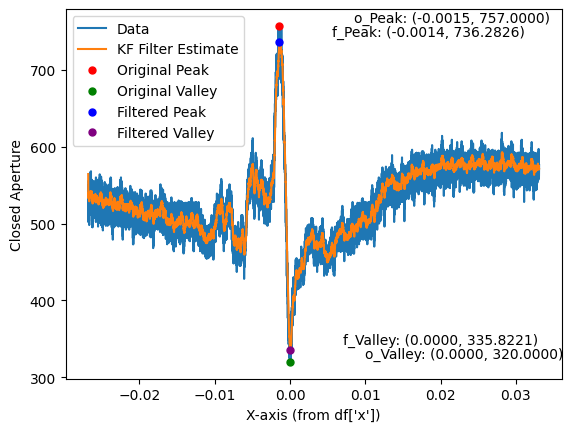

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Assuming 'Closed Aperture' is a valid column in df
closed_aperture_list = list(df['Closed Aperture'])

kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=2000,
                  initial_state_covariance=100,
                  observation_covariance=1,
                  transition_covariance=.01)

# Apply Kalman filter (filtering only)
filtered_data, _ = kf.filter(closed_aperture_list)




# Plot the data and filtered estimate
plt.plot(df['x'], closed_aperture_list, label='Data')
plt.plot(df['x'], filtered_data, label='KF Filter Estimate')

# Find the peak point of the original data
peak_index = np.argmax(closed_aperture_list)
peak_x_value = df['x'].iloc[peak_index]
peak_y_value = closed_aperture_list[peak_index]
# Mark the peak point with a marker and label
plt.plot(peak_x_value, peak_y_value, 'o', color='red', markersize=5, label='Original Peak')
# Display coordinates of the peak point
plt.annotate(f"o_Peak: ({peak_x_value:.4f}, {peak_y_value:.4f})",
             xy=(peak_x_value, peak_y_value),
             xytext=(peak_x_value + 0.01, peak_y_value + 5))  # Adjust offsets as needed


# Find the valley point of the original data
valley_index = np.argmin(closed_aperture_list)
valley_x_value = df['x'].iloc[valley_index]
valley_y_value = closed_aperture_list[valley_index]
# Mark the valley point with a marker and label
plt.plot(valley_x_value, valley_y_value, 'o', color='green', markersize=5, label='Original Valley')
# Display coordinates of the valley point
plt.annotate(f"o_Valley: ({valley_x_value:.4f}, {valley_y_value:.4f})",
             xy=(valley_x_value, valley_y_value),
             xytext=(valley_x_value + 0.01, valley_y_value + 5))  # Adjust offsets as needed






# Find the peak and valley points of the filtered curve
filtered_peak_index = np.argmax(filtered_data)
filtered_valley_index = np.argmin(filtered_data)

filtered_peak_x_value = df['x'].iloc[filtered_peak_index]
filtered_peak_y_value = filtered_data[filtered_peak_index]

filtered_valley_x_value = df['x'].iloc[filtered_valley_index]
filtered_valley_y_value = filtered_data[filtered_valley_index]


# Plot the peak point of the filtered curve
plt.plot(filtered_peak_x_value, filtered_peak_y_value, 'o', color='blue', markersize=5, label='Filtered Peak')

# Format string and label adjusted for peak point
plt.annotate(f"f_Peak: ({filtered_peak_x_value:.4f}, {filtered_peak_y_value[0]:.4f})",  # Use peak_x_value and adjust for scalar/array
             xy=(filtered_peak_x_value, filtered_peak_y_value),
             xytext=(filtered_peak_x_value + 0.007, filtered_peak_y_value + 7))  # Adjust y-offset for visibility


# Plot the valley point of the filtered curve
plt.plot(filtered_valley_x_value, filtered_valley_y_value, 'o', color='purple', markersize=5, label='Filtered Valley')  # Color adjusted to purple

# Format string and label adjusted for valley point
plt.annotate(f"f_Valley: ({filtered_valley_x_value:.4f}, {filtered_valley_y_value[0]:.4f})",  # Use valley_x_value and adjust for scalar/array
             xy=(filtered_valley_x_value, filtered_valley_y_value),
             xytext=(filtered_valley_x_value + 0.007, filtered_valley_y_value + 7))  # Adjust y-offset for visibility



plt.xlabel("X-axis (from df['x'])")
plt.ylabel("Closed Aperture")
plt.legend(loc="upper left")
plt.show()

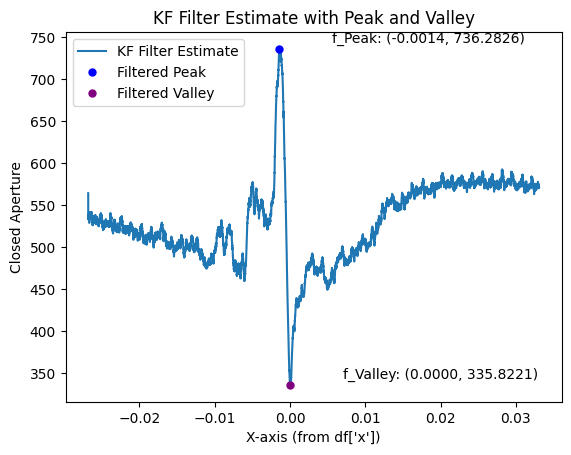

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Assuming 'Closed Aperture' is a valid column in df
closed_aperture_list = list(df['Closed Aperture'])

kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=2000,
                  initial_state_covariance=100,
                  observation_covariance=1,
                  transition_covariance=.01)

# Apply Kalman filter (filtering only)
filtered_data, _ = kf.filter(closed_aperture_list)

# Find the peak and valley points of the filtered curve
filtered_peak_index = np.argmax(filtered_data)
filtered_valley_index = np.argmin(filtered_data)

filtered_peak_x_value = df['x'].iloc[filtered_peak_index]
filtered_peak_y_value = filtered_data[filtered_peak_index]

filtered_valley_x_value = df['x'].iloc[filtered_valley_index]
filtered_valley_y_value = filtered_data[filtered_valley_index]

# Plot only the filtered curve and its peak and valley
plt.plot(df['x'], filtered_data, label='KF Filter Estimate')

plt.plot(filtered_peak_x_value, filtered_peak_y_value, 'o', color='blue', markersize=5, label='Filtered Peak')
plt.annotate(f"f_Peak: ({filtered_peak_x_value:.4f}, {filtered_peak_y_value[0]:.4f})",
              xy=(filtered_peak_x_value, filtered_peak_y_value),
              xytext=(filtered_peak_x_value + 0.007, filtered_peak_y_value + 7))

plt.plot(filtered_valley_x_value, filtered_valley_y_value, 'o', color='purple', markersize=5, label='Filtered Valley')
plt.annotate(f"f_Valley: ({filtered_valley_x_value:.4f}, {filtered_valley_y_value[0]:.4f})",
              xy=(filtered_valley_x_value, filtered_valley_y_value),
              xytext=(filtered_valley_x_value + 0.007, filtered_valley_y_value + 7))

# Add labels and title
plt.xlabel("X-axis (from df['x'])")
plt.ylabel("Closed Aperture")
plt.title("KF Filter Estimate with Peak and Valley")
plt.legend(loc="upper left")
plt.show()

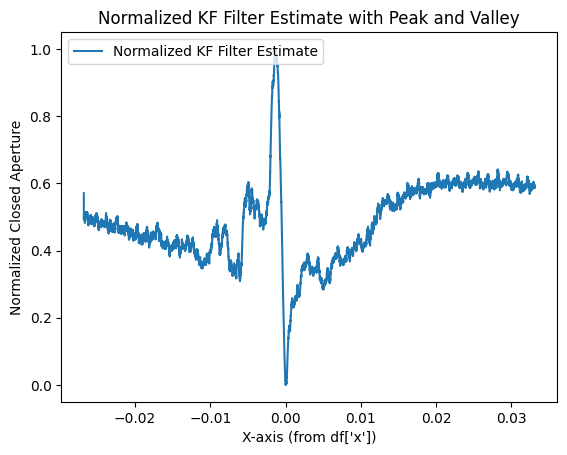

In [27]:
# Normalize the filtered data
filtered_data_normalized = (filtered_data - filtered_data.min()) / (filtered_data.max() - filtered_data.min())

# Find the peak and valley points of the normalized filtered curve
normalized_filtered_peak_index = np.argmax(filtered_data_normalized)
normalized_filtered_valley_index = np.argmin(filtered_data_normalized)

# ... (rest of the peak and valley calculations remain the same) ...

# Plot only the normalized filtered curve and its peak and valley
plt.plot(df['x'], filtered_data_normalized, label='Normalized KF Filter Estimate')

# ... (rest of the plotting code remains the same, but adjusted for normalized values) ...

# Add labels and title
plt.xlabel("X-axis (from df['x'])")
plt.ylabel("Normalized Closed Aperture")  # Adjust label for normalized data
plt.title("Normalized KF Filter Estimate with Peak and Valley")
plt.legend(loc="upper left")
plt.show()

In [28]:
pip install matplotlib

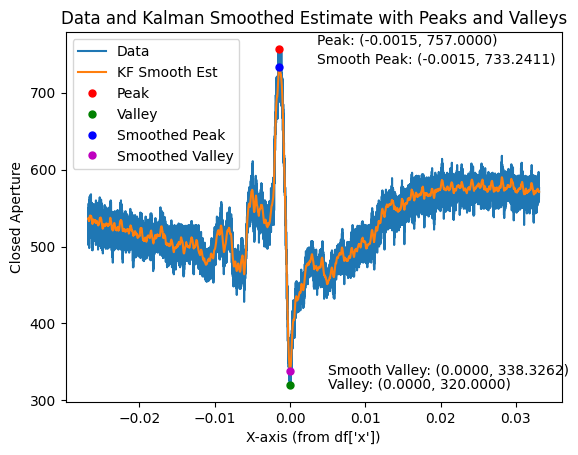

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Assuming 'Closed Aperture' is a valid column in df
closed_aperture_list = list(df['Closed Aperture'])

kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=2000,
                  initial_state_covariance=100,
                  observation_covariance=1,
                  transition_covariance=.01)

# Apply Kalman smoothing directly
smoothed_data, _ = kf.smooth(closed_aperture_list)

# Find peak and valley points and their coordinates
peak_index = np.argmax(closed_aperture_list)
peak_x = df['x'].iloc[peak_index]
peak_y = closed_aperture_list[peak_index]

valley_index = np.argmin(closed_aperture_list)
valley_x = df['x'].iloc[valley_index]
valley_y = closed_aperture_list[valley_index]


# Find peak and valley points and their coordinates for the smoothed curve
smoothed_peak_index = np.argmax(smoothed_data)  # Use descriptive variable names
smoothed_peak_x = df['x'].iloc[smoothed_peak_index]
smoothed_peak_y = smoothed_data[smoothed_peak_index]

smoothed_valley_index = np.argmin(smoothed_data)
smoothed_valley_x = df['x'].iloc[smoothed_valley_index]
smoothed_valley_y = smoothed_data[smoothed_valley_index]


# Plot both curves
plt.plot(df['x'], closed_aperture_list, label='Data')
plt.plot(df['x'], smoothed_data, label='KF Smooth Est')


# Annotate peak and valley points
plt.plot(peak_x, peak_y, 'o', color='red', markersize=5, label='Peak')
plt.annotate(f"Peak: ({peak_x:.4f}, {peak_y:.4f})", xy=(peak_x, peak_y), xytext=(peak_x + 0.005, peak_y + 5))

plt.plot(valley_x, valley_y, 'o', color='green', markersize=5, label='Valley')
plt.annotate(f"Valley: ({valley_x:.4f}, {valley_y:.4f})", xy=(valley_x, valley_y), xytext=(valley_x + 0.005, valley_y - 5))



# Annotate only peak and valley points on the smoothed curve

plt.plot(smoothed_peak_x, smoothed_peak_y, 'o', color='blue', markersize=5, label='Smoothed Peak')
plt.annotate(f"Smooth Peak: ({smoothed_peak_x:.4f}, {smoothed_peak_y[0]:.4f})",  # Access individual elements
              xy=(smoothed_peak_x, smoothed_peak_y), xytext=(smoothed_peak_x + 0.005, smoothed_peak_y + 5))

plt.plot(smoothed_valley_x, smoothed_valley_y, 'o', color='m', markersize=5, label='Smoothed Valley')
plt.annotate(f"Smooth Valley: ({smoothed_valley_x:.4f}, {smoothed_valley_y[0]:.4f})",  # Access individual elements
              xy=(smoothed_valley_x, smoothed_valley_y), xytext=(smoothed_valley_x + 0.005, smoothed_valley_y - 5))



# Add informative labels, title, and legend
plt.xlabel("X-axis (from df['x'])")
plt.ylabel("Closed Aperture")
plt.title("Data and Kalman Smoothed Estimate with Peaks and Valleys")
plt.legend()

# Show the plot
plt.show()

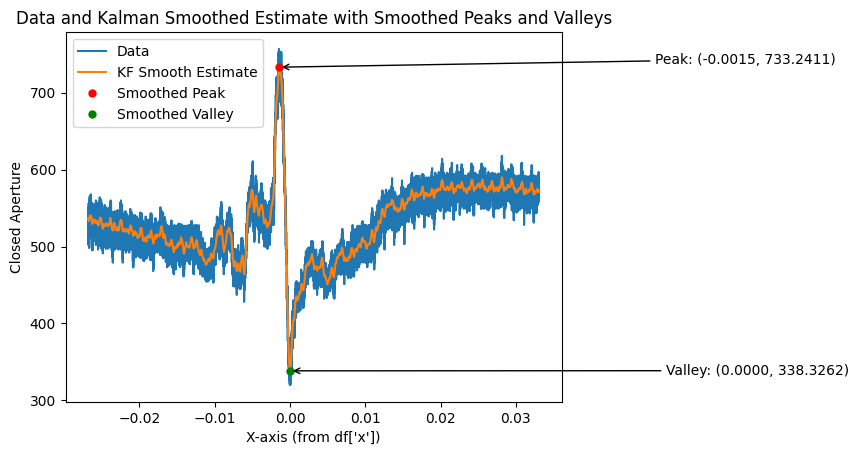

ΔT_pv        : 394.914852
ΔΦ₀          : 1314.307903 rad
n₂           : 1.573e-12 m^2/W
Re[χ^(3)]    : 6.264e-15 (m^2/V^2)
Re[χ^(3)]    : 5.630e-05 esu (CGS)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from scipy.constants import c, epsilon_0, pi

# Assuming 'Closed Aperture' is a valid column in df
closed_aperture_list = list(df['Closed Aperture'])

kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=2000,
                  initial_state_covariance=100,
                  observation_covariance=1,
                  transition_covariance=.01)

# Apply Kalman smoothing (not filtering)
smoothed_data, _ = kf.smooth(closed_aperture_list)

# Plot the data and smoothed estimate
plt.plot(df['x'], closed_aperture_list, label='Data')
plt.plot(df['x'], smoothed_data, label='KF Smooth Estimate')

# Find peak and valley points and their coordinates for the smoothed curve
smoothed_peak_index = np.argmax(smoothed_data)
smoothed_peak_x = df['x'].iloc[smoothed_peak_index]
smoothed_peak_y = smoothed_data[smoothed_peak_index]

smoothed_valley_index = np.argmin(smoothed_data)
smoothed_valley_x = df['x'].iloc[smoothed_valley_index]
smoothed_valley_y = smoothed_data[smoothed_valley_index]

# Annotate only peak and valley points on the smoothed curve
plt.plot(smoothed_peak_x, smoothed_peak_y, 'o', color='red', markersize=5, label='Smoothed Peak')

plt.plot(smoothed_valley_x, smoothed_valley_y, 'o', color='green', markersize=5, label='Smoothed Valley')


# Find peak and valley points and their coordinates for the smoothed curve
smoothed_peak_index = np.argmax(smoothed_data)
smoothed_peak_x = df['x'].iloc[smoothed_peak_index]
smoothed_peak_y = smoothed_data[smoothed_peak_index]

smoothed_valley_index = np.argmin(smoothed_data)
smoothed_valley_x = df['x'].iloc[smoothed_valley_index]
smoothed_valley_y = smoothed_data[smoothed_valley_index]

# Annotate peaks with labels containing coordinates
plt.annotate(f"Peak: ({smoothed_peak_x:.4f}, {smoothed_peak_y[0]:.4f})",
             xy=(smoothed_peak_x, smoothed_peak_y),
             xytext=(smoothed_peak_x + 0.05, smoothed_peak_y + 5),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

# Annotate valleys with labels containing coordinates
plt.annotate(f"Valley: ({smoothed_valley_x:.4f}, {smoothed_valley_y[0]:.4f})",
             xy=(smoothed_valley_x, smoothed_valley_y),
             xytext=(smoothed_valley_x + 0.05, smoothed_valley_y - 5),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10)



# Add informative labels, title, and legend
plt.xlabel("X-axis (from df['x'])")
plt.ylabel("Closed Aperture")
plt.title("Data and Kalman Smoothed Estimate with Smoothed Peaks and Valleys")
plt.legend()

# Show the plot
plt.show()


# ----- 1. Realistic Experimental Input Values -----
# Example values (from typical Z-scan studies)
lambda_nm = 532                # Wavelength in nm (green laser)
wavelength = lambda_nm * 1e-9 # Wavelength in meters
n0 = 1.5                       # Linear refractive index (e.g., glass)
w0 = 30e-6                     # Beam waist radius (30 microns)
tau = 10e-9                    # Pulse width (10 ns)
E = 1e-6                       # Pulse energy in joules (1 µJ)
L = 1e-3                       # Sample thickness (1 mm)
alpha = 0                     # Assume low absorption, for now
S = 0.7                        # Aperture transmittance (common value)

# Calculate peak intensity I0
I0 = (2 * E) / (pi * w0**2 * tau)  # Peak intensity (W/m^2)

# Effective length (L_eff)
L_eff = L if alpha == 0 else (1 - np.exp(-alpha * L)) / alpha

# ----- 2. Extract ΔT_pv from smoothed Z-scan data -----
# Example: smoothed_data from your Kalman output
# Make sure smoothed_data is a flat array (not 2D from Kalman)
smoothed_data_flat = smoothed_data.flatten()

T_peak = np.max(smoothed_data_flat)
T_valley = np.min(smoothed_data_flat)
delta_T_pv = T_peak - T_valley

# ----- 3. Compute ΔΦ₀ (nonlinear phase shift) -----
# Equation: ΔT_pv ≈ 0.406 * (1 - S)^0.25 * |ΔΦ₀|
# Solve for ΔΦ₀
delta_phi0 = delta_T_pv / (0.406 * (1 - S)**0.25)

# ----- 4. Compute n₂ -----
n2 = (wavelength / (2 * pi * I0 * L_eff)) * delta_phi0  # Units: m^2/W

# ----- 5. Compute Re[χ^(3)] -----
chi3_real = (2 * n0**2 * epsilon_0 * c * n2) / 3  # Units: (m^2/V^2)

# Optional: Convert to esu units if needed
# 1 (m^2/V^2) ≈ 1.11265e-10 esu
chi3_real_esu = chi3_real / 1.11265e-10

# ----- 6. Display Results -----
print(f"ΔT_pv        : {delta_T_pv:.6f}")
print(f"ΔΦ₀          : {delta_phi0:.6f} rad")
print(f"n₂           : {n2:.3e} m^2/W")
print(f"Re[χ^(3)]    : {chi3_real:.3e} (m^2/V^2)")
print(f"Re[χ^(3)]    : {chi3_real_esu:.3e} esu (CGS)")

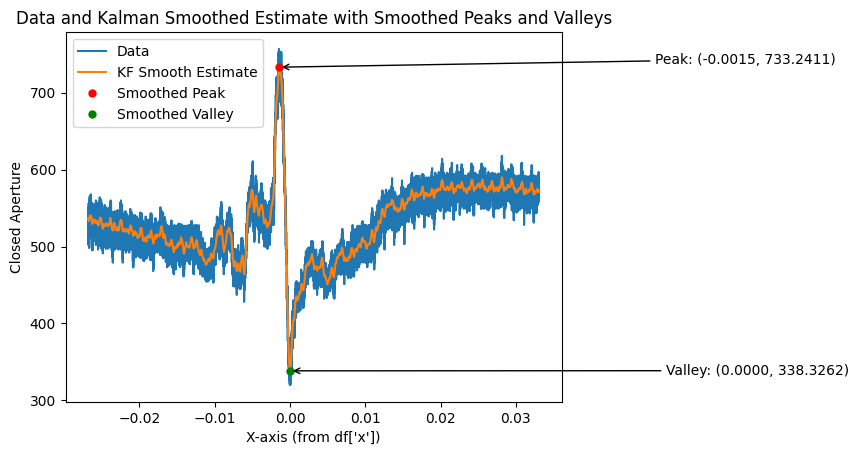

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Assuming 'Closed Aperture' is a valid column in df
closed_aperture_list = list(df['Closed Aperture'])

kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=2000,
                  initial_state_covariance=100,
                  observation_covariance=1,
                  transition_covariance=.01)

# Apply Kalman smoothing (not filtering)
smoothed_data, _ = kf.smooth(closed_aperture_list)

# Plot the data and smoothed estimate
plt.plot(df['x'], closed_aperture_list, label='Data')
plt.plot(df['x'], smoothed_data, label='KF Smooth Estimate')

# Find peak and valley points and their coordinates for the smoothed curve
smoothed_peak_index = np.argmax(smoothed_data)
smoothed_peak_x = df['x'].iloc[smoothed_peak_index]
smoothed_peak_y = smoothed_data[smoothed_peak_index]

smoothed_valley_index = np.argmin(smoothed_data)
smoothed_valley_x = df['x'].iloc[smoothed_valley_index]
smoothed_valley_y = smoothed_data[smoothed_valley_index]

# Annotate only peak and valley points on the smoothed curve
plt.plot(smoothed_peak_x, smoothed_peak_y, 'o', color='red', markersize=5, label='Smoothed Peak')

plt.plot(smoothed_valley_x, smoothed_valley_y, 'o', color='green', markersize=5, label='Smoothed Valley')


# Find peak and valley points and their coordinates for the smoothed curve
smoothed_peak_index = np.argmax(smoothed_data)
smoothed_peak_x = df['x'].iloc[smoothed_peak_index]
smoothed_peak_y = smoothed_data[smoothed_peak_index]

smoothed_valley_index = np.argmin(smoothed_data)
smoothed_valley_x = df['x'].iloc[smoothed_valley_index]
smoothed_valley_y = smoothed_data[smoothed_valley_index]

# Annotate peaks with labels containing coordinates
plt.annotate(f"Peak: ({smoothed_peak_x:.4f}, {smoothed_peak_y[0]:.4f})",
             xy=(smoothed_peak_x, smoothed_peak_y),
             xytext=(smoothed_peak_x + 0.05, smoothed_peak_y + 5),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

# Annotate valleys with labels containing coordinates
plt.annotate(f"Valley: ({smoothed_valley_x:.4f}, {smoothed_valley_y[0]:.4f})",
             xy=(smoothed_valley_x, smoothed_valley_y),
             xytext=(smoothed_valley_x + 0.05, smoothed_valley_y - 5),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10)



# Add informative labels, title, and legend
plt.xlabel("X-axis (from df['x'])")
plt.ylabel("Closed Aperture")
plt.title("Data and Kalman Smoothed Estimate with Smoothed Peaks and Valleys")
plt.legend()

# Show the plot
plt.show()



Original Data:
- Highest value: 757
- Lowest value: 320
- Del(T_pv): 437
- Del(Z_pv): 0.0598999999999999
- x peak value: 0.0330917923504686
- x valley value: -0.0268082076495313

Kalman Filtered Data:
- Highest value: [736.2826305]
- Lowest value: [335.82205848]
- Del(T_pv): [400.46057201]
- Del(Z_pv): -0.0014727871311885285
- x peak value: -0.0014363290030902699
- x valley value: 3.6458128098258626e-05


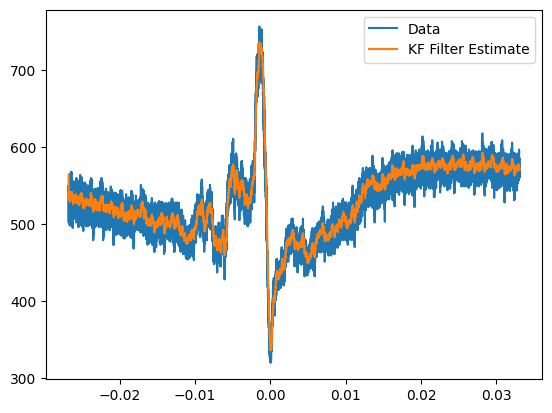

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Assuming 'Closed Aperture' is a valid column in df
closed_aperture_list = list(df['Closed Aperture'])

kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=2000,
                  initial_state_covariance=100,
                  observation_covariance=1,
                  transition_covariance=.01)

# Apply Kalman filter (filtering only, without smoothing)
filtered_data, _ = kf.filter(closed_aperture_list)

# Find the peak & valley value of original data
highest_data_value = max(closed_aperture_list)
lowest_data_value = min(closed_aperture_list)

#Find the Del(T_pv)
y_distance = highest_data_value - lowest_data_value
# Find the Del(Z_pv)
highest_x_value = max(df['x'])
lowest_x_value = min(df['x'])
x_distance = highest_x_value - lowest_x_value




# Find peak & valley value of filtered data
highest_filtered_value = max(filtered_data)
lowest_filtered_value = min(filtered_data)

# Find Del(T_pv) for filtered data
yf_distance = highest_filtered_value - lowest_filtered_value

# Find Del(Z_pv) for filtered data (calculate separate peak and valley x-values)
highest_x_value_filt = df['x'][np.argmax(filtered_data)]  # Find x-value of peak in filtered data
lowest_x_value_filt = df['x'][np.argmin(filtered_data)]  # Find x-value of valley in filtered data
x_distance_filt = highest_x_value_filt - lowest_x_value_filt

# Print results
print("\nOriginal Data:")
print("- Highest value:", highest_data_value)
print("- Lowest value:", lowest_data_value)
print("- Del(T_pv):", y_distance)
print("- Del(Z_pv):", x_distance)
print("- x peak value:", highest_x_value)
print("- x valley value:", lowest_x_value)

print("\nKalman Filtered Data:")
print("- Highest value:", highest_filtered_value)
print("- Lowest value:", lowest_filtered_value)
print("- Del(T_pv):", yf_distance)
print("- Del(Z_pv):", x_distance_filt)
print("- x peak value:", highest_x_value_filt)  # Added for filtered data
print("- x valley value:", lowest_x_value_filt)  # Added for filtered data




# Plot the data and filtered estimate
plt.plot(df['x'], closed_aperture_list, label='Data')
plt.plot(df['x'], filtered_data, label='KF Filter Estimate')  # Use filtered data
plt.legend()
plt.show()


In [45]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from scipy.constants import c, epsilon_0, pi

def analyze_closed_aperture_zscan(df, material_id="Sample", lambda_nm=532, w0=30e-6, tau=10e-9,
                                   E=1e-6, L=1e-3, n0=1.5, S=0.7, alpha=0, plot=False):
    # Constants
    wavelength = lambda_nm * 1e-9  # Convert nm to meters
    I0 = (2 * E) / (pi * w0**2 * tau)
    L_eff = L if alpha == 0 else (1 - np.exp(-alpha * L)) / alpha

    # Kalman Filter
    closed_aperture = list(df['Closed Aperture'])
    kf = KalmanFilter(transition_matrices=[1],
                      observation_matrices=[1],
                      initial_state_mean=2000,
                      initial_state_covariance=100,
                      observation_covariance=1,
                      transition_covariance=0.01)
    filtered_data, _ = kf.filter(closed_aperture)
    filtered_data = filtered_data.flatten()

    # ΔT_pv and ΔZ_pv
    delta_T_pv = max(filtered_data) - min(filtered_data)
    x_peak = df['x'].iloc[np.argmax(filtered_data)]
    x_valley = df['x'].iloc[np.argmin(filtered_data)]
    delta_Z_pv = x_peak - x_valley

    # ΔΦ₀, n2, χ(3)
    delta_phi0 = delta_T_pv / (0.406 * (1 - S)**0.25)
    n2 = (wavelength / (2 * pi * I0 * L_eff)) * delta_phi0
    chi3_real = (2 * n0**2 * epsilon_0 * c * n2) / 3
    chi3_real_esu = chi3_real / 1.11265e-10

    # Return DataFrame row
    return pd.DataFrame([{
        'Material_ID': material_id,
        'lambda_nm': lambda_nm,
        'I0_Wm2': I0,
        'w0_m': w0,
        'tau_s': tau,
        'L_m': L,
        'S_aperture': S,
        'n0': n0,
        'delta_T_pv': delta_T_pv,
        'delta_Z_pv': delta_Z_pv,
        'delta_phi0_rad': delta_phi0,
        'n2_m2W': n2,
        'chi3_real_m2V2': chi3_real,
        'chi3_real_esu': chi3_real_esu
    }])


In [46]:
features_df = analyze_closed_aperture_zscan(df, material_id="ZnO", plot=False)
features_df.to_csv("zscan_features.csv", index=False)


In [48]:
!git config --global user.email "nfs.hsn03@gmail.com"
!git config --global user.name "nfs3"
!git add .
!git commit -m "new features_1.03"
!git push origin main


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [33]:
df['x']

,x
0,-0.026808
1,-0.026803
2,-0.026798
3,-0.026793
4,-0.026788
...,...
11994,0.033072
11995,0.033077
11996,0.033082
11997,0.033087


Highest value in original data: 757
- Lowest value: 320
Highest value in smoothed data: [733.24105194]


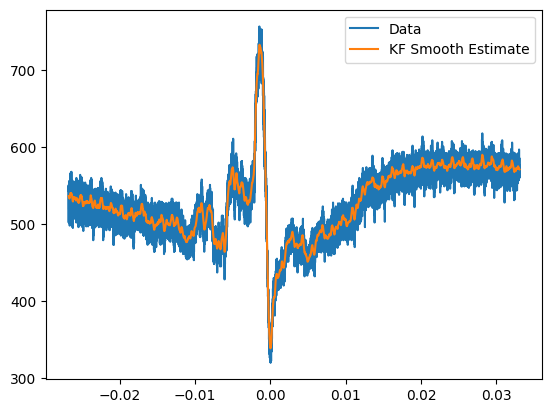

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Assuming 'Closed Aperture' is a valid column in df
closed_aperture_list = list(df['Closed Aperture'])

kf = KalmanFilter(transition_matrices=[1],
                   observation_matrices=[1],
                   initial_state_mean=2000,
                   initial_state_covariance=100,
                   observation_covariance=1,
                   transition_covariance=.01)

# Filter and smooth in a single step
smoothed_data, _ = kf.smooth(closed_aperture_list)

# Find the highest value in both the original data and smoothed data
highest_data_value = max(closed_aperture_list)
highest_smoothed_value = max(smoothed_data)

# Print the highest values
print("Highest value in original data:", highest_data_value)
print("- Lowest value:", lowest_data_value)

print("Highest value in smoothed data:", highest_smoothed_value)

# Plot the data and smoothed estimate
#plt.plot(df['x'], df['Closed Aperture'])
plt.plot(df['x'], closed_aperture_list, label='Data')
plt.plot(df['x'], smoothed_data, label='KF Smooth Estimate')
plt.legend()
plt.show()


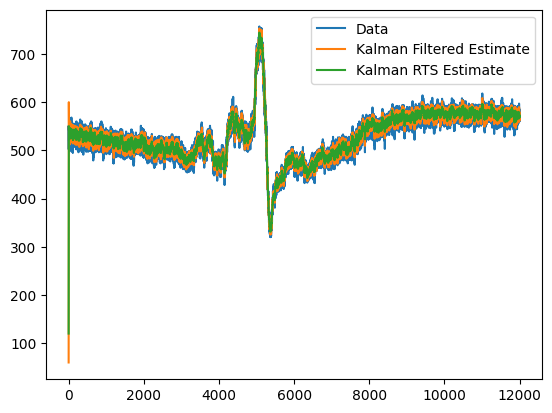

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Assuming 'Closed Aperture' is a valid column in df
closed_aperture_list = list(df['Closed Aperture'])

kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., 1.])  # State (position and velocity)
kf.F = np.array([[1., 1.],
                  [0., 1.]])  # Constant velocity model
kf.H = np.array([[1., 0.]])  # Measurement function
kf.P *= 0.1  # Covariance matrix
kf.R = 10.0  # Measurement uncertainty

# Filter and smooth
mu, cov, _, _ = kf.batch_filter(closed_aperture_list)
M, _, _, _ = kf.rts_smoother(mu, cov)

# Plot the data, filtered estimate, and smoothed estimate
plt.plot(closed_aperture_list, label='Data')
plt.plot(mu[:, 0], label='Kalman Filtered Estimate')
plt.plot(M[:, 0], label='Kalman RTS Estimate')
plt.legend()
plt.show()


In [36]:
#from pykalman import KalmanFilter
#from filterpy.kalman import KalmanFilter

 #Construct a Kalman filter
#kf = KalmanFilter(transition_matrices = [2],
                  observation_matrices = [1],
                  initial_state_mean = 2000,
                  initial_state_covariance = 100,
                  observation_covariance=1,
                  transition_covariance=.01)

#closed_aperture_list = list(df['Closed Aperture'])

#fk = KalmanFilter(dim_x=2, dim_z=1)

#fk.x = np.array([0., 1.])      # state (x and dx)

#fk.F = np.array([[1., 1.],
                     [0., 1.]])    # state transition matrix

#fk.H = np.array([[1., 0.]])    # Measurement function
#fk.P*= 10.                     # covariance matrix
#fk.R = 10.0                   # state uncertainty

#mu, cov, _, _ = fk.batch_filter(closed_aperture_list)
#M, P, C, _ = fk.rts_smoother(mu, cov)
#plt.plot(closed_aperture_list, label='A')
#plt.plot(M[:, 0], c='b', label='B')
#plt.plot(mu[:, 0], c='g', ls='--', label='KF output')

#kf1 = kf.filter(closed_aperture_list)
#smooth_cl_ap, _ = kf.smooth(kf1[0])
# Use the observed values of the price to get a rolling mean
#state_means, _ = kf.filter(closed_aperture_list)
#plt.plot(closed_aperture_list)
#plt.plot(smooth_cl_ap)
#plt.plot(kf1[0])

# Calculate the moving average with a window size of 5 (adjust as needed)
#df['Smoothed Closed Aperture'] = df['Closed Aperture'].rolling(window=5).mean()

# Plot the smoothed curve and original curve
#plt.plot(df['x'], df['Smoothed Closed Aperture'], label='Smoothed Curve')
#plt.plot(df['x'], df['Closed Aperture'], label='Original Curve')
#plt.legend()
#plt.show()

# Calculate the moving average based on the smoothed curve
#moving_average = df['Smoothed Closed Aperture'].rolling(window=5).mean()
#print(moving_average)

IndentationError: unexpected indent (ipython-input-36-1429117635.py, line 6)

In [ ]:
#from pykalman import KalmanFilter
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

# Construct a Kalman filter
#kf = KalmanFilter(transition_matrices = [1],
#                  observation_matrices = [1],
#                  initial_state_mean = 2000,
#                  initial_state_covariance = 100,
#                  observation_covariance=1,
#                  transition_covariance=.01)

closed_aperture_list = list(df['Closed Aperture'])

fk = KalmanFilter(dim_x=2, dim_z=1)

fk.x = np.array([0., 1.])      # state (x and dx)

fk.F = np.array([[1., 1.],
                     [0., 1.]])    # state transition matrix

fk.H = np.array([[1., 0.]])    # Measurement function
fk.P*= 10.                     # covariance matrix
fk.R = 10.0                   # state uncertainty
#fk.Q = Q_discrete_white_noise(dim=2, dt=1., var=0.001)  # process uncertainty

mu, cov, _, _ = fk.batch_filter(closed_aperture_list)
M, P, C, _ = fk.rts_smoother(mu, cov)

plt.plot(closed_aperture_list, label='A')

plt.plot(mu[:, 0], c='g', ls='--', label='KF output')

plt.plot(M[:, 0], c='b', label='B')


#kf1 = kf.filter(closed_aperture_list)
#smooth_cl_ap, _ = kf.smooth(kf1[0])
# Use the observed values of the price to get a rolling mean
#state_means, _ = kf.filter(closed_aperture_list)
#plt.plot(closed_aperture_list)
#plt.plot(smooth_cl_ap)
#plt.plot(kf1[0])

# Calculate the moving average with a window size of 5 (adjust as needed)
#df['Smoothed Closed Aperture'] = df['Closed Aperture'].rolling(window=5).mean()

# Plot the smoothed curve and original curve
#plt.plot(df['x'], df['Smoothed Closed Aperture'], label='Smoothed Curve')
#plt.plot(df['x'], df['Closed Aperture'], label='Original Curve')
#plt.legend()
#plt.show()

# Calculate the moving average based on the smoothed curve
#moving_average = df['Smoothed Closed Aperture'].rolling(window=5).mean()
#print(moving_average)

Original Data:
- Highest value: 757
- Lowest value: 320
- Distance: 437

Kalman Filtered Data:
- Highest value: [693.20860859]
- Lowest value: [411.9145428]
- Distance: [281.29406579]

Rolling Mean (window=10):
- Highest value: 742.5
- Lowest value: 332.40000000000003
- Distance: 410.09999999999997


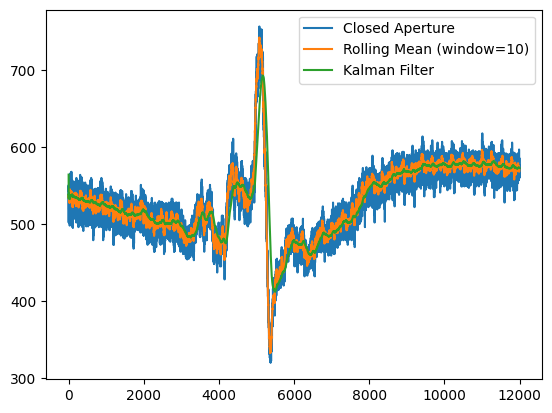

In [37]:
from pykalman import KalmanFilter
import numpy as np  # Added for rolling mean calculation

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=2000,
                  initial_state_covariance=100,
                  observation_covariance=1,
                  transition_covariance=.0001)

closed_aperture_list = list(df['Closed Aperture'])

# Filter the data
mean, cov = kf.filter(closed_aperture_list)

# Calculate rolling mean with a window size of 10 (adjust as needed)
rolling_mean = np.convolve(closed_aperture_list, np.ones(10)/10, mode='valid')





# Find the highest and lowest values for each curve
highest_data_value = max(closed_aperture_list)
lowest_data_value = min(closed_aperture_list)
data_distance = highest_data_value - lowest_data_value

highest_filtered_value = max(mean)
lowest_filtered_value = min(mean)
filtered_distance = highest_filtered_value - lowest_filtered_value

highest_rolling_mean_value = max(rolling_mean)
lowest_rolling_mean_value = min(rolling_mean)
rolling_mean_distance = highest_rolling_mean_value - lowest_rolling_mean_value

# Print the results
print("Original Data:")
print("- Highest value:", highest_data_value)
print("- Lowest value:", lowest_data_value)
print("- Distance:", data_distance)

print("\nKalman Filtered Data:")
print("- Highest value:", highest_filtered_value)
print("- Lowest value:", lowest_filtered_value)
print("- Distance:", filtered_distance)

print("\nRolling Mean (window=10):")
print("- Highest value:", highest_rolling_mean_value)
print("- Lowest value:", lowest_rolling_mean_value)
print("- Distance:", rolling_mean_distance)










# Plot the data, filtered estimate, and rolling mean
plt.plot(closed_aperture_list, label='Closed Aperture')

plt.plot(rolling_mean, label='Rolling Mean (window=10)')

plt.plot(mean, label='Kalman Filter')

plt.legend()
plt.show()


In [38]:
import numpy as np
from scipy.optimize import fsolve

def calculate_delta_phi(z, T_x, z0=1):
    """
    Calculates the nonlinear phase shift (ΔΦ) from measured transmittance (T_x) and sample position (z) in a closed-aperture Z-scan experiment.

    Args:
        z: Sample position relative to the focal point (units).
        T_x: Measured transmittance at position x (dimensionless).
        z0: Rayleigh range of the focused beam (units, default=1).

    Returns:
        delta_phi: Nonlinear phase shift (radians).
    """

    def equation_to_solve(x):
        """Equation to find the root of, representing T(x) - T_x."""
        return 1 + 4 * x / ((1 + x**2) * (x**2 + 9)) - T_x

    # Calculate x from z (dimensionless position parameter)
    x = z / z0

    # Calculate ΔΦ with the found x
    delta_phi = (T_x - 1) * (1 + x**2) * (x**2 + 9) / (4 * x)

    return delta_phi

# Get the value of z and T(x) from the user
z = float(input("Enter the sample position (z): "))
T_x = float(input("Enter the measured transmittance at position x (T(x)): "))

# Calculate ΔΦ using the provided data
delta_phi = calculate_delta_phi(z, T_x)

print(f"Nonlinear phase shift (ΔΦ): {delta_phi:.4f} radians")


Enter the sample position (z): 340
Enter the measured transmittance at position x (T(x)): 283
Nonlinear phase shift (ΔΦ): 2771171701.8662 radians


In [ ]:
# prompt: Enter the sample position (z) would generally be ?

# Get the value of z and T(x) from the user
z = float(input("Enter the sample position (z): "))
T_x = float(input("Enter the measured transmittance at position x (T(x)): "))


Highest value in original data: 757
Highest value in Kalman filtered data: [693.20860859]


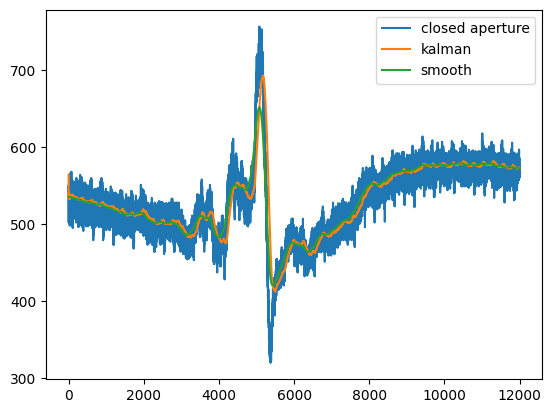

In [40]:
from pykalman import KalmanFilter

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 2000,
                  initial_state_covariance = 100,
                  observation_covariance=1,
                  transition_covariance=.0001)
closed_aperture_list = list(df['Closed Aperture'])
mean, cov = kf.filter(closed_aperture_list)
smooth_cl_ap, _ = kf.smooth(closed_aperture_list)

# Find the highest values in both the original data and filtered data
highest_data_value = max(closed_aperture_list)
highest_filtered_value = max(mean)

# Print the highest values
print("Highest value in original data:", highest_data_value)
print("Highest value in Kalman filtered data:", highest_filtered_value)


# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(closed_aperture_list)
plt.plot(closed_aperture_list, label='closed aperture')
plt.plot(mean, label='kalman')
plt.plot(smooth_cl_ap,label='smooth')
plt.legend()

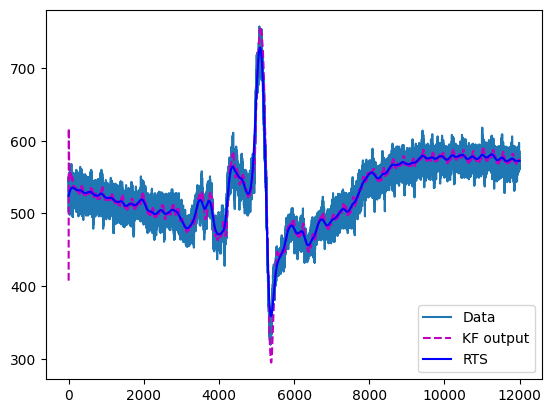

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

def plot_rts(noise, Q=0.000002, show_velocity=False):
    fk = KalmanFilter(dim_x=2, dim_z=1)

    fk.x = np.array([0., 1.])      # state (x and dx)

    fk.F = np.array([[1., 1.],
                     [0., 1.]])    # state transition matrix

    fk.H = np.array([[1., 0.]])    # Measurement function
    fk.P*= 10.                     # covariance matrix
    fk.R = noise                   # state uncertainty
    fk.Q = Q_discrete_white_noise(dim=2, dt=1., var=Q)  # process uncertainty

    # create noisy data
    #zs = np.asarray([t + randn()*noise for t in range (40)])

    # filter data with Kalman filter, than run smoother on it
    mu, cov, _, _ = fk.batch_filter(closed_aperture_list)
    M, P, C, _ = fk.rts_smoother(mu, cov)

    # plot data
    if show_velocity:
        index = 1
        print('gu')
    else:
        index = 0
    if not show_velocity:
        plt.plot(closed_aperture_list , label='Data')
    plt.plot(mu[:, index], c='m', ls='--', label='KF output')



    plt.plot(M[:, index], c='b', label='RTS')

    plt.legend(loc=4)
    plt.show()

plot_rts(7.)

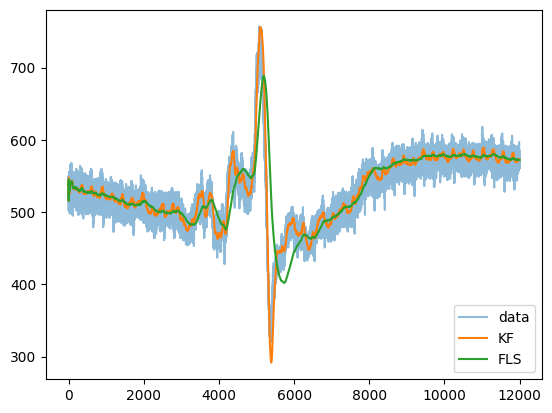

In [44]:
from filterpy.kalman import FixedLagSmoother, KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np
import matplotlib.pyplot as plt

fls = FixedLagSmoother(dim_x=2, dim_z=1, N=8)

fls.x = np.array([0., .5])
fls.F = np.array([[1.,1.],
                  [0.,1.]])

fls.H = np.array([[1.,0.]])
fls.P *= 200
fls.R *= 5.
fls.Q *= 0.000000001

kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., .5])
kf.F = np.array([[1.,1.],
                 [0.,1.]])
kf.H = np.array([[1.,0.]])
kf.P *= 200
kf.R *= 5.
kf.Q = Q_discrete_white_noise(dim=2, dt=1., var=0.000001)

N = 100 # size of lag

#nom =  np.array([t/2. for t in range (0, 40)])
zs = closed_aperture_list

for z in zs:
    fls.smooth(z)

kf_x, _, _, _ = kf.batch_filter(zs)
x_smooth = np.array(fls.xSmooth)[:, 0]


plt.plot(zs, alpha=0.5, label='data')
plt.plot(kf_x[:, 0], label='KF')
plt.plot(x_smooth, label='FLS')
plt.legend(loc=4)

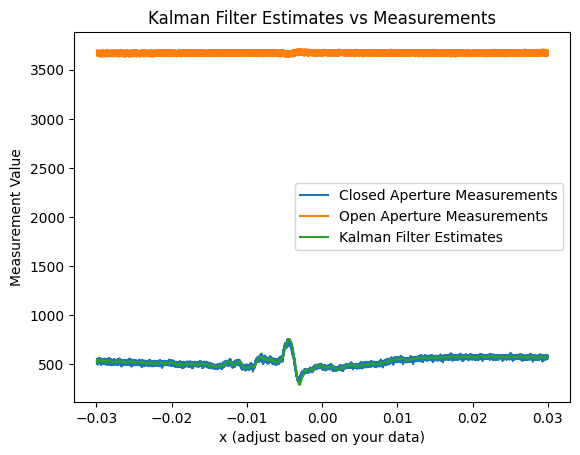

In [43]:
import pandas as pd
import numpy as np
from filterpy.kalman import KalmanFilter
from collections import deque
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/MyDrive/datum/193_ca_oa.csv", header=0)
df_x = pd.read_csv("/content/drive/MyDrive/datum/193_calculated.csv", header=0)

# Extract x-axis values robustly
try:
    x = df_x['x'].values  # Access values directly for efficiency
except KeyError:
    raise ValueError("Column 'x' not found in df_x for x-axis values.")

# Create DataFrame with verified column names
x_extended = np.linspace(x[0], x[-1], 11999)  # Resample to match 11999 elements
df = pd.DataFrame({'x': x_extended, 'Closed Aperture': df['551'], 'Open Aperture': df['3696']})

# Kalman Filter setup (using your existing parameters)
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., .5])
kf.F = np.array([[1., 1.], [0., 1.]])
kf.H = np.array([[1., 0.]])
kf.P *= 200
kf.R *= 5.
kf.Q = Q_discrete_white_noise(dim=2, dt=1., var=0.000001)

# Moving average adaptation parameters
window_size = 10  # Example window size

# Placeholders for residuals and moving averages
state_residuals = deque(maxlen=window_size)
innovation_residuals = deque(maxlen=window_size)
Q_moving_average = 0
R_moving_average = 0

# Store state estimates for plotting
state_estimates = []

# Main loop
for z in df['Closed Aperture'].values:  # Assuming you want to filter 'Closed Aperture'
    kf.predict()
    kf.update(z)

    # ... (rest of your adaptation code)

    state_estimates.append(kf.x[0])

# Plotting
plt.plot(df['x'], df['Closed Aperture'], label='Closed Aperture Measurements')
plt.plot(df['x'], df['Open Aperture'], label='Open Aperture Measurements')
plt.plot(df['x'], state_estimates, label='Kalman Filter Estimates')
plt.legend()
plt.xlabel('x (adjust based on your data)')
plt.ylabel('Measurement Value')
plt.title('Kalman Filter Estimates vs Measurements')
plt.show()
